In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

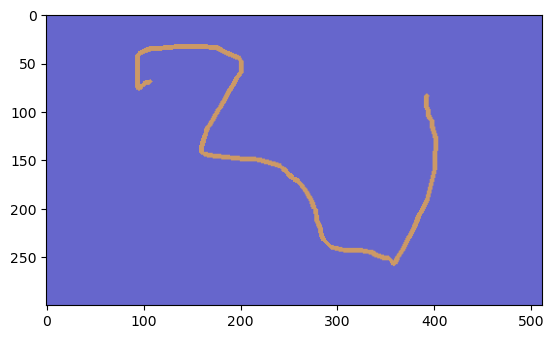

In [5]:
drawing = False
win_name = "OpenCV Paint App"
color_preview_pos = [(400, 30), (490,90)]
bgr_track = {'B': 0, 'G': 0, 'R': 0, 'Br Size': 1}
font = cv2.FONT_HERSHEY_DUPLEX
ix, iy = 0,0

img = np.zeros((400,512,3), np.uint8)
org_img = img.copy()
cv2.namedWindow(win_name)

# The same function as nothing
def br_or_bg(x):
    pass

# To change the text and display the red color value
def update_R_value(x):
    global font, img, bgr_track
    img = cv2.putText(img, f"{bgr_track['R']}", (50, 65), font, 0.5, 1, cv2.LINE_8)
    img = cv2.putText(img, f"{x}", (50, 65), font, 0.5, (0,0,255), 1, cv2.LINE_8)
    bgr_track['R'] = x
    
# To change the text and display the green color value
def update_G_value(x):
    global font, img, bgr_track
    img = cv2.putText(img, f"{bgr_track['G']}", (140, 65), font, 0.5, 1, cv2.LINE_8)
    img = cv2.putText(img, f"{x}", (140, 65), font, 0.5, (0,255,0), 1, cv2.LINE_8)
    bgr_track['G'] = x
    
# To change the text and display the blue color value
def update_B_value(x):
    global font, img, bgr_track
    img = cv2.putText(img, f"{bgr_track['B']}", (230, 65), font, 0.5, 1, cv2.LINE_8)
    img = cv2.putText(img, f"{x}", (230, 65), font, 0.5, (255,0,0), 1, cv2.LINE_8)
    bgr_track['B'] = x
    
# To change the text and display the brush size value  
def update_brs_value(x):
    global font, img, bgr_track
    img = cv2.putText(img, f"{bgr_track['Br Size']}", (365, 65), font, 0.5, 1, cv2.LINE_8)
    img = cv2.putText(img, f"{x}", (365, 65), font, 0.5, (255,255,255), 1, cv2.LINE_8)
    bgr_track['Br Size'] = x

# drawing Line with mouse events
def draw_line(event, x, y, flags, param):
    global drawing, img, ix, iy

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.line(img, (ix, iy), (x, y), (cv2.getTrackbarPos("B", win_name),
                                             cv2.getTrackbarPos("G", win_name),
                                             cv2.getTrackbarPos("R", win_name)), cv2.getTrackbarPos("Br Size", win_name))
            drawing = True
            ix, iy = x,y

    elif event==cv2.EVENT_LBUTTONUP:
        drawing = False


# Trackbars creation
cv2.createTrackbar("Br/Bg SW", win_name, 0 ,1, br_or_bg)
cv2.createTrackbar("R", win_name, 0 ,255, update_R_value)
cv2.createTrackbar("G", win_name, 0, 255, update_G_value)
cv2.createTrackbar("B", win_name, 0, 255, update_B_value)
cv2.createTrackbar("Br Size", win_name, 1, 15, update_brs_value)
# Set the minimum size of the brush Trackbar
cv2.setTrackbarMin("Br Size", win_name, 1)
# Draw lines on mouse events
cv2.setMouseCallback(win_name, draw_line)

while True:
    cv2.imshow(win_name, img)
    
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
    elif key == ord("r"):
        img = org_img.copy()
        
    # Get Trackbars values
    sw = cv2.getTrackbarPos("Br/Bg SW", win_name)
    b = cv2.getTrackbarPos("B", win_name)
    g = cv2.getTrackbarPos("G", win_name)
    r = cv2.getTrackbarPos("R", win_name)
    s = cv2.getTrackbarPos("Br Size", win_name)
    
    # If change the sw switch to bg, we can create the background color with r, g, and b
    if sw == 1:
        img[:] = [b, g, r]
        
    else:
        # Update appearance settings after switching back to brush 
        cv2.rectangle(img, color_preview_pos[0], color_preview_pos[1], (b,g,r), -1)
        img = cv2.putText(img, "R: ", (30, 65), font, 0.5, (0,0,255), 1)
        img = cv2.putText(img, "G: ", (120, 65), font, 0.5, (0,255,0), 1)
        img = cv2.putText(img, "B: ", (210, 65), font, 0.5, (255,0,0), 1)
        img = cv2.putText(img, "Br Size: ", (300, 65), font, 0.5, (255,255,255), 1)
        
        img = cv2.putText(img, str(r), (50, 65), font, 0.5, (0,0,255), 1)
        img = cv2.putText(img, str(g), (140, 65), font, 0.5, (0,255,0), 1)
        img = cv2.putText(img, str(b), (230, 65), font, 0.5, (255,0,0), 1)
        img = cv2.putText(img, str(s), (365, 65), font, 0.5, (255,255,255), 1)
        
    
cv2.destroyAllWindows()
img = img[100:512, 0:512]
plt.imshow(img[...,::-1])